In [34]:
import numpy as np
import matplotlib.pyplot as plt
import psycopg2


def connect_to_database():
    file = open('dbconnectioncredentials', 'r')
    creds_dict = {}
    for line in file:
        credential = line.split("=")
        value = credential[1]
        creds_dict[credential[0]] = value[0:len(value) - 1]
    connection = psycopg2.connect(
        host=creds_dict['SERVER'],
        dbname=creds_dict['DATABASE_NAME'],
        user=creds_dict['USER_NAME'],
        password=creds_dict['PASSWORD'],
        port=creds_dict['PORT']
    )
    return connection

conn = connect_to_database()
cursor = conn.cursor()

Histogram obrazujący sentyment wszysktich pobranych tweetów dotyczących brexitu:

Total tweets count: 353976
Negative tweets count: 63462
Neutral tweets count: 163662
Positive tweets count: 126852


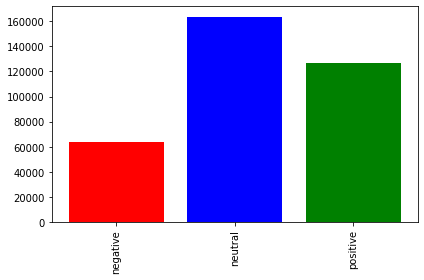

In [54]:
def count_tweets_with_given_sentiment(cursor, sentiment):
    switcher = {
        'negative': "SELECT count(*) FROM tweets WHERE sentiment<0;",
        'neutral': "SELECT count(*) FROM tweets WHERE sentiment=0;",
        'positive': "SELECT count(*) FROM tweets WHERE sentiment>0;" 
    }
    postgres_select_query = switcher.get(sentiment)
    cursor.execute(postgres_select_query)
    return cursor.fetchall()


def draw_downloaded_tweets_sentiment_histogram(cursor):
    negative_tweets_count = count_tweets_with_given_sentiment(cursor, 'negative')
    neutral_tweets_count = count_tweets_with_given_sentiment(cursor, 'neutral')
    positive_tweets_count = count_tweets_with_given_sentiment(cursor, 'positive')
    
    print('Total tweets count: %d' % (negative_tweets_count[0][0] + neutral_tweets_count[0][0] + positive_tweets_count[0][0]))
    print('Negative tweets count: %d' % (negative_tweets_count[0][0]))
    print('Neutral tweets count: %d' % (neutral_tweets_count[0][0]))
    print('Positive tweets count: %d' % (positive_tweets_count[0][0]))
    
    sentiment = ['negative', 'neutral', 'positive']
    tweets_count = []
    
    tweets_count.append(negative_tweets_count[0][0])
    tweets_count.append(neutral_tweets_count[0][0])
    tweets_count.append(positive_tweets_count[0][0])

    indices = np.arange(3)
    plt.bar(indices, tweets_count, color=['red', 'blue', 'green'])
    plt.xticks(indices, sentiment, rotation='vertical')
    plt.tight_layout()
    plt.show()

draw_downloaded_tweets_sentiment_histogram(cursor)

Histogram przedstawiający ilość followersów dla pięciu najbardziej obserwowanych użytkowników:

Followers number for each user:
User Reuters has 20949987 followers
User CGTN has 14113367 followers
User China Xinhua News has 12621094 followers
User Times of India has 12211531 followers
User NDTV has 11881309 followers


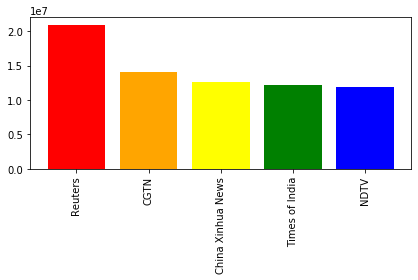

In [36]:
def get_top_five_followed_users(cursor):
    postgres_select_query = "SELECT * FROM users ORDER BY followersnumber DESC FETCH FIRST 5 ROWS ONLY;"
    cursor.execute(postgres_select_query)
    return cursor.fetchall()
    
def draw_top_five_followed_users(data):    
    users_names = []
    followers_number = []
    for i, user in enumerate(data):
        users_names.append(data[i][1])
        followers_number.append(data[i][6])
        
    indices = np.arange(5)
    plt.bar(indices, followers_number, color=['red', 'orange', 'yellow', 'green', 'blue'])
    plt.xticks(indices, users_names, rotation='vertical')
    plt.tight_layout()
    plt.show()

def print_user_followers_no(user_name, followers_no):
    print('User %s has %d followers' % (user_name, followers_no))
    
top_five_followed_users_data = get_top_five_followed_users(cursor)
print('Followers number for each user:')
for user_data in top_five_followed_users_data:
    print_user_followers_no(user_data[1], user_data[6])
draw_top_five_followed_users(top_five_followed_users_data)

Histogram przedstawiający dziesięciu najbardziej wspominanych użytkowników:

Mentions number for each user:
User Boris Johnson has 21216 mentions
User Conservatives has 11508 mentions
User Liberal Democrats has 6063 mentions
User Jo Swinson has 3445 mentions
User Nigel Farage has 3105 mentions
User BBC Politics has 2205 mentions
User BBC News (UK) has 1784 mentions
User Sky News has 1480 mentions
User LBC has 1400 mentions
User Matt Hancock has 1246 mentions


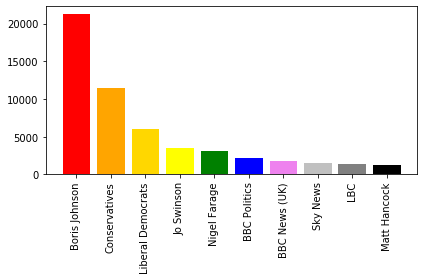

In [37]:
def get_top_ten_mentioned_users(cursor):
    postgres_select_query = "SELECT users.name, userid, COUNT(tweetid) AS mentionsNumber FROM mentions INNER JOIN users ON mentions.userid = users.id GROUP BY users.name, userid ORDER BY mentionsNumber DESC FETCH FIRST 10 ROWS ONLY;"
    cursor.execute(postgres_select_query)
    return cursor.fetchall()
    
def draw_top_ten_mentioned_users(data):    
    users_names = []
    mentions_number = []
    for i, user in enumerate(data):
        users_names.append(data[i][0])
        mentions_number.append(data[i][2])
        
    indices = np.arange(10)
    plt.bar(indices, mentions_number, color=['red', 'orange', 'gold', 'yellow', 'green', 'blue', 'violet', 'silver', 'grey', 'black'])
    plt.xticks(indices, users_names, rotation='vertical')
    plt.tight_layout()
    plt.show()

def print_user_mentions_no(user_name, mentions_no):
    print('User %s has %d mentions' % (user_name, mentions_no))    
    
top_ten_mentioned_users_data = get_top_ten_mentioned_users(cursor)
print('Mentions number for each user:')
for user_data in top_ten_mentioned_users_data:
    print_user_mentions_no(user_data[0], user_data[2])
draw_top_five_mentioned_users(top_five_mentioned_users_data)

Histogram przedstawiający ilość pobranych tweetów dotyczących brexitu w danym dniu:

Tweets about brexit written each day:
On 2019-11-11	 was 796	 tweets about brexit published.
On 2019-11-12	 was 7604	 tweets about brexit published.
On 2019-11-13	 was 9100	 tweets about brexit published.
On 2019-11-14	 was 9667	 tweets about brexit published.
On 2019-11-15	 was 6017	 tweets about brexit published.
On 2019-11-16	 was 848	 tweets about brexit published.
On 2019-11-17	 was 8083	 tweets about brexit published.
On 2019-11-18	 was 8677	 tweets about brexit published.
On 2019-11-19	 was 12939	 tweets about brexit published.
On 2019-11-20	 was 7220	 tweets about brexit published.
On 2019-11-21	 was 8029	 tweets about brexit published.
On 2019-11-22	 was 9624	 tweets about brexit published.
On 2019-11-23	 was 9187	 tweets about brexit published.
On 2019-11-24	 was 10433	 tweets about brexit published.
On 2019-11-25	 was 9577	 tweets about brexit published.
On 2019-11-26	 was 10276	 tweets about brexit published.
On 2019-11-27	 was 3984	 tweets about brexit published.
On 2019-1

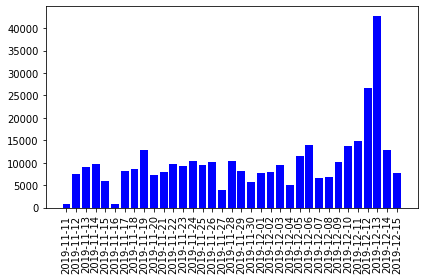

In [38]:
def get_tweets_number_in_each_day(cursor):
    postgres_select_query = "SELECT DATE(createdat) AS date, COUNT(id) AS tweets_number FROM tweets GROUP BY date ORDER BY date;"
    cursor.execute(postgres_select_query)
    return cursor.fetchall()

def draw_tweets_number_in_each_day_histogram(data):    
    days = []
    tweets_number = []
    for i, user in enumerate(data):
        days.append(data[i][0])
        tweets_number.append(data[i][1])
        
    indices = np.arange(len(days))
    plt.bar(indices, tweets_number, color=('b'))
    plt.xticks(indices, days, rotation='vertical')
    plt.tight_layout()
    plt.show()

tweets_number_per_day_count = get_tweets_number_in_each_day(cursor)
print('Tweets about brexit written each day:')
total_tweets_count_fetched = 0 
for day, tweets_number in tweets_number_per_day_count:
    print("On %s\t was %d\t tweets about brexit published." % (day, tweets_number))
    total_tweets_count_fetched += tweets_number
print('Total tweets count fetched till now: %d' % (total_tweets_count_fetched))
draw_tweets_number_in_each_day_histogram(tweets_number_per_day_count)

Histogram obrazujący najczęściej wykorzystywane hashtagi spośród obserowowanych przez nas:

Numbers of tweets where particular hashtag was used:
Hashtag brexit was used in 123097 tweets.
Hashtag getbrexitdone was used in 21393 tweets.
Hashtag stopbrexit was used in 20417 tweets.
Hashtag brexitdeal was used in 485 tweets.
Hashtag hardbrexit was used in 319 tweets.


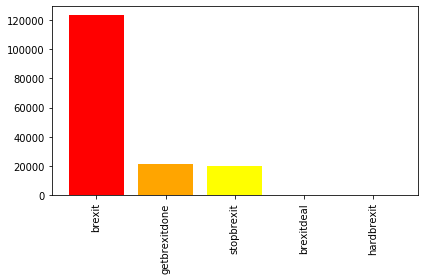

In [39]:
def get_hashtags_uses_count(cursor):
    postgres_select_query = "SELECT h.name, COUNT(tweets.id) AS hashtags_count FROM tweets INNER JOIN tweetshashtags th ON tweets.id = th.tweetid INNER JOIN hashtags h on th.hashtagid = h.id GROUP BY h.name ORDER BY hashtags_count DESC;"
    cursor.execute(postgres_select_query)
    return cursor.fetchall()

def draw_hashtag_uses_count(data):    
    hashtags_names = []
    tweets_number = []
    for i, user in enumerate(data):
        hashtags_names.append(data[i][0])
        tweets_number.append(data[i][1])
        
    indices = np.arange(len(hashtags_names))
    plt.bar(indices, tweets_number, color=['red', 'orange', 'yellow', 'green', 'blue'])
    plt.xticks(indices, hashtags_names, rotation='vertical')
    plt.tight_layout()
    plt.show()

hashtags_count = get_hashtags_uses_count(cursor)
print('Numbers of tweets where particular hashtag was used:')
total_tweets_count_fetched = 0 
for hashtag_name, tweets_number in hashtags_count:
    print("Hashtag %s was used in %d tweets." % (hashtag_name, tweets_number))
draw_hashtag_uses_count(hashtags_count)

Histogramy przedstawiające rozłożenie sentymentu tweetów, w których wspominany został Boris Johnson przed i po wyborach

Total tweets count before elections mentioning Boris Johnson: 17149
Negative tweets count before elecions: 3890
Neutral tweets count before elecions: 7069
Positive tweets count before elecions: 6190


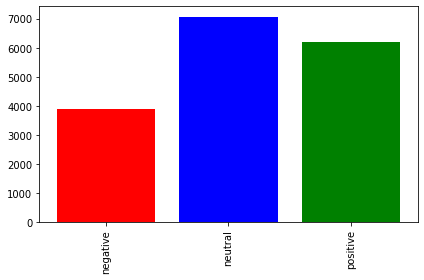

Total tweets count during and after elections mentioning Boris Johnson: 4067
Negative tweets count during and after elecions: 634
Neutral tweets count during and after elecions: 1823
Positive tweets count during and after elecions: 1610


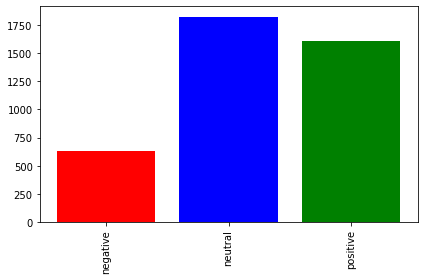

In [57]:
def get_tweets_with_given_sentiment_count_before_elections(cursor, name, sentiment):
    switcher = {
        'negative': "SELECT count(t.id) FROM tweets t INNER JOIN mentions m ON t.id = m.tweetid INNER JOIN users u ON m.userid = u.id WHERE t.createdat<'2019-12-12' AND u.name=%s AND t.sentiment<0;",
        'neutral': "SELECT count(t.id) FROM tweets t INNER JOIN mentions m ON t.id = m.tweetid INNER JOIN users u ON m.userid = u.id WHERE t.createdat<'2019-12-12' AND u.name=%s AND t.sentiment=0;",
        'positive': "SELECT count(t.id) FROM tweets t INNER JOIN mentions m ON t.id = m.tweetid INNER JOIN users u ON m.userid = u.id WHERE t.createdat<'2019-12-12' AND u.name=%s AND t.sentiment>0;" 
    }
    postgres_select_query = switcher.get(sentiment)
    cursor.execute(postgres_select_query, [name])
    return cursor.fetchall()

def get_tweets_with_given_sentiment_count_during_and_after_elections(cursor, name, sentiment):
    switcher = {
        'negative': "SELECT count(t.id) FROM tweets t INNER JOIN mentions m ON t.id = m.tweetid INNER JOIN users u ON m.userid = u.id WHERE t.createdat>='2019-12-12' AND u.name=%s AND t.sentiment<0;",
        'neutral': "SELECT count(t.id) FROM tweets t INNER JOIN mentions m ON t.id = m.tweetid INNER JOIN users u ON m.userid = u.id WHERE t.createdat>='2019-12-12' AND u.name=%s AND t.sentiment=0;",
        'positive': "SELECT count(t.id) FROM tweets t INNER JOIN mentions m ON t.id = m.tweetid INNER JOIN users u ON m.userid = u.id WHERE t.createdat>='2019-12-12' AND u.name=%s AND t.sentiment>0;" 
    }
    postgres_select_query = switcher.get(sentiment)
    cursor.execute(postgres_select_query, [name])
    return cursor.fetchall()

def draw_tweets_sentiment_mentioning_user_before_elections_histogram(data, name):    
    negative_tweets_count = get_tweets_with_given_sentiment_count_before_elections(data, name, 'negative')
    neutral_tweets_count = get_tweets_with_given_sentiment_count_before_elections(data, name, 'neutral')
    positive_tweets_count = get_tweets_with_given_sentiment_count_before_elections(data, name, 'positive')
    
    print('Total tweets count before elections mentioning %s: %d' % (name, negative_tweets_count[0][0] + neutral_tweets_count[0][0] + positive_tweets_count[0][0]))
    print('Negative tweets count before elecions: %d' % (negative_tweets_count[0][0]))
    print('Neutral tweets count before elecions: %d' % (neutral_tweets_count[0][0]))
    print('Positive tweets count before elecions: %d' % (positive_tweets_count[0][0]))
    
    sentiment = ['negative', 'neutral', 'positive']
    tweets_count = []
    
    tweets_count.append(negative_tweets_count[0][0])
    tweets_count.append(neutral_tweets_count[0][0])
    tweets_count.append(positive_tweets_count[0][0])

    indices = np.arange(3)
    plt.bar(indices, tweets_count, color=['red', 'blue', 'green'])
    plt.xticks(indices, sentiment, rotation='vertical')
    plt.tight_layout()
    plt.show()
    
def draw_tweets_sentiment_mentioning_user_during_and_after_elections_histogram(data, name):    
    negative_tweets_count = get_tweets_with_given_sentiment_count_during_and_after_elections(data, name, 'negative')
    neutral_tweets_count = get_tweets_with_given_sentiment_count_during_and_after_elections(data, name, 'neutral')
    positive_tweets_count = get_tweets_with_given_sentiment_count_during_and_after_elections(data, name, 'positive')
    
    print('Total tweets count during and after elections mentioning %s: %d' % (name, negative_tweets_count[0][0] + neutral_tweets_count[0][0] + positive_tweets_count[0][0]))
    print('Negative tweets count during and after elecions: %d' % (negative_tweets_count[0][0]))
    print('Neutral tweets count during and after elecions: %d' % (neutral_tweets_count[0][0]))
    print('Positive tweets count during and after elecions: %d' % (positive_tweets_count[0][0]))
    
    sentiment = ['negative', 'neutral', 'positive']
    tweets_count = []
    
    tweets_count.append(negative_tweets_count[0][0])
    tweets_count.append(neutral_tweets_count[0][0])
    tweets_count.append(positive_tweets_count[0][0])

    indices = np.arange(3)
    plt.bar(indices, tweets_count, color=['red', 'blue', 'green'])
    plt.xticks(indices, sentiment, rotation='vertical')
    plt.tight_layout()
    plt.show()

draw_tweets_sentiment_mentioning_user_before_elections_histogram(cursor, 'Boris Johnson')
draw_tweets_sentiment_mentioning_user_during_and_after_elections_histogram(cursor, 'Boris Johnson')

Histogramy przedstawiające rozłożenie sentymentu tweetów, w których wspominiana została partia konserwatywna (Conservatives) przed i po wyborach

Total tweets count before elections mentioning Conservatives: 9863
Negative tweets count before elecions: 2117
Neutral tweets count before elecions: 3992
Positive tweets count before elecions: 3754


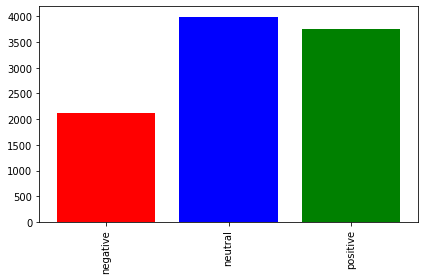

Total tweets count during and after elections mentioning Conservatives: 1645
Negative tweets count during and after elecions: 307
Neutral tweets count during and after elecions: 603
Positive tweets count during and after elecions: 735


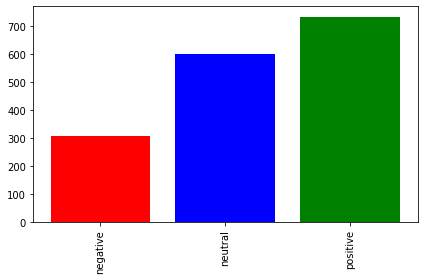

In [41]:
draw_tweets_sentiment_mentioning_user_before_elections_histogram(cursor, 'Conservatives')
draw_tweets_sentiment_mentioning_user_during_and_after_elections_histogram(cursor, 'Conservatives')

Histogramy przedstawiające rozłożenie sentymentu tweetów, w których wspominiana została partia Liberalnych Demokratów (Liberal Democrates) przed i po wyborach

Total tweets count before elections mentioning Liberal Democrats: 5518
Negative tweets count before elecions: 1061
Neutral tweets count before elecions: 1924
Positive tweets count before elecions: 2533


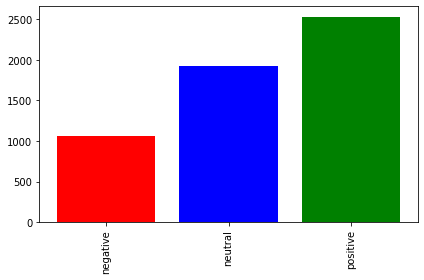

Total tweets count during and after elections mentioning Liberal Democrats: 545
Negative tweets count during and after elecions: 94
Neutral tweets count during and after elecions: 214
Positive tweets count during and after elecions: 237


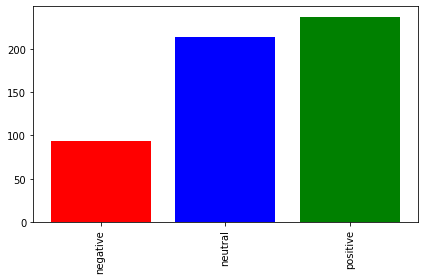

In [42]:
draw_tweets_sentiment_mentioning_user_before_elections_histogram(cursor, 'Liberal Democrats')
draw_tweets_sentiment_mentioning_user_during_and_after_elections_histogram(cursor, 'Liberal Democrats')

Histogramy przedstawiające rozłożenie sentymentu tweetów, w których wspominiana została Jo Swinson przed i po wyborach

Total tweets count before elections mentioning Jo Swinson: 3051
Negative tweets count before elecions: 767
Neutral tweets count before elecions: 950
Positive tweets count before elecions: 1334


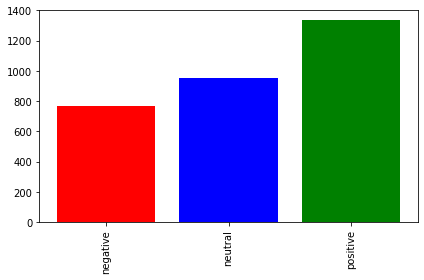

Total tweets count during and after elections mentioning Jo Swinson: 394
Negative tweets count during and after elecions: 96
Neutral tweets count during and after elecions: 130
Positive tweets count during and after elecions: 168


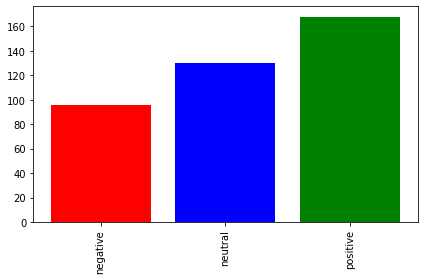

In [43]:
draw_tweets_sentiment_mentioning_user_before_elections_histogram(cursor, 'Jo Swinson')
draw_tweets_sentiment_mentioning_user_during_and_after_elections_histogram(cursor, 'Jo Swinson')

Histogramy przedstawiające rozłożenie sentymentu tweetów, w których wspominiana została Nigel Farage przed i po wyborach

Total tweets count before elections mentioning Nigel Farage: 2593
Negative tweets count before elecions: 609
Neutral tweets count before elecions: 854
Positive tweets count before elecions: 1130


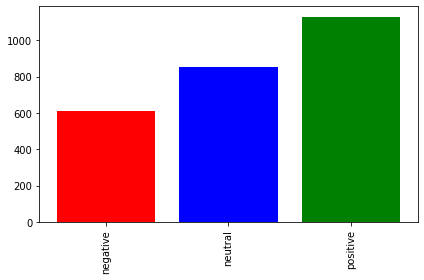

Total tweets count during and after elections mentioning Nigel Farage: 512
Negative tweets count during and after elecions: 83
Neutral tweets count during and after elecions: 201
Positive tweets count during and after elecions: 228


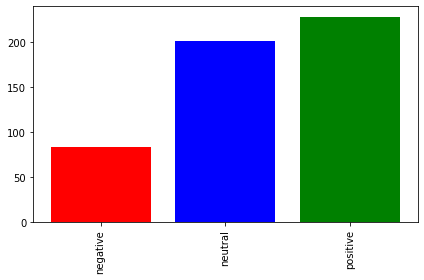

In [45]:
draw_tweets_sentiment_mentioning_user_before_elections_histogram(cursor, 'Nigel Farage')
draw_tweets_sentiment_mentioning_user_during_and_after_elections_histogram(cursor, 'Nigel Farage')

Histogram przedstawiający rozłożenie sentymentu komentarzy do tweetów Borisa Johnsona

Total comments to Boris Johnson tweets: 50
Negative comments count: 5
Neutral comments count: 25
Positive comments count: 20


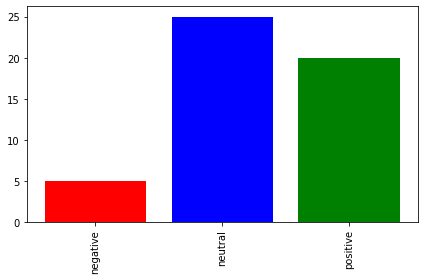

In [47]:
def get_tweets_w_count(cursor, name, screen_name, sentiment):
    switcher = {
        'negative': "SELECT count(c.tweetid) FROM comments c INNER JOIN tweets t ON c.tweetid = t.id WHERE t.inReplyToUserId = (SELECT id FROM users WHERE name=%s AND screenname=%s) AND t.sentiment<0;",
        'neutral': "SELECT count(c.tweetid) FROM comments c INNER JOIN tweets t ON c.tweetid = t.id WHERE t.inReplyToUserId = (SELECT id FROM users WHERE name=%s AND screenname=%s) AND t.sentiment=0;",
        'positive': "SELECT count(c.tweetid) FROM comments c INNER JOIN tweets t ON c.tweetid = t.id WHERE t.inReplyToUserId = (SELECT id FROM users WHERE name=%s AND screenname=%s) AND t.sentiment>0;" 
    }
    postgres_select_query = switcher.get(sentiment)
    cursor.execute(postgres_select_query, [name, screen_name])
    return cursor.fetchall()

def draw_comments_to_user_tweets_sentiment_histogram(data, name, screen_name):    
    negative_comments_count = get_negative_tweets_count(data, name, screen_name)
    neutral_comments_count = get_neutral_tweets_count(data, name, screen_name)
    positive_comments_count = get_positive_tweets_count(data, name, screen_name)
    
    print('Total comments to %s tweets: %d' % (name, negative_comments_count[0][0] + neutral_comments_count[0][0] + positive_comments_count[0][0]))
    print('Negative comments count: %d' % (negative_comments_count[0][0]))
    print('Neutral comments count: %d' % (neutral_comments_count[0][0]))
    print('Positive comments count: %d' % (positive_comments_count[0][0]))
    
    sentiment = ['negative', 'neutral', 'positive']
    comments_count = []
    
    comments_count.append(negative_comments_count[0][0])
    comments_count.append(neutral_comments_count[0][0])
    comments_count.append(positive_comments_count[0][0])

    indices = np.arange(3)
    plt.bar(indices, comments_count, color=['red', 'blue', 'green'])
    plt.xticks(indices, sentiment, rotation='vertical')
    plt.tight_layout()
    plt.show()
    
draw_comments_to_user_tweets_sentiment_histogram(cursor, 'Boris Johnson', 'BorisJohnson')

Histogram przedstawiający rozłożenie sentymentu komentarzy do tweetów partii Konserwatystów (Conservatives)

Total comments to Conservatives tweets: 16
Negative comments count: 6
Neutral comments count: 3
Positive comments count: 7


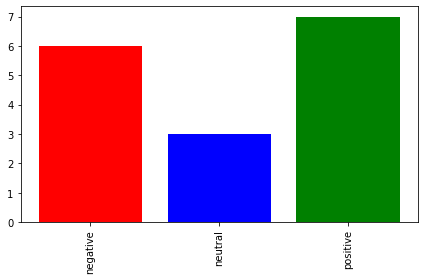

In [48]:
draw_comments_to_user_tweets_sentiment_histogram(cursor, 'Conservatives', 'Conservatives')

Histogram przedstawiający rozłożenie sentymentu komentarzy do tweetów Jo Swinson

Total comments to Jo Swinson tweets: 6
Negative comments count: 2
Neutral comments count: 1
Positive comments count: 3


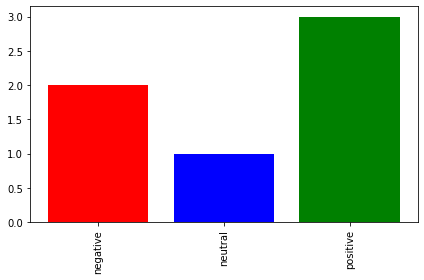

In [49]:
draw_comments_to_user_tweets_sentiment_histogram(cursor, 'Jo Swinson', 'joswinson')

Histogram przedstawiający rozłożenie sentymentu komentarzy do tweetów partii Liberalnych Demokratów (Liberal Democrats)

Total comments to Liberal Democrats tweets: 5
Negative comments count: 3
Neutral comments count: 0
Positive comments count: 2


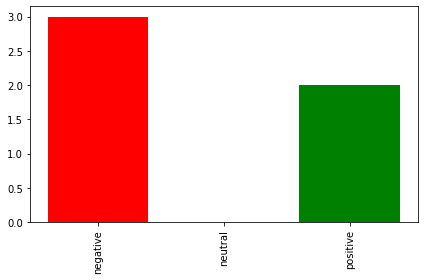

In [50]:
draw_comments_to_user_tweets_sentiment_histogram(cursor, 'Liberal Democrats', 'LibDems')

Histogram przedstawiający rozłożenie sentymentu komentarzy do tweetów Nigela Farage'a

Total comments to Nigel Farage tweets: 2
Negative comments count: 0
Neutral comments count: 1
Positive comments count: 1


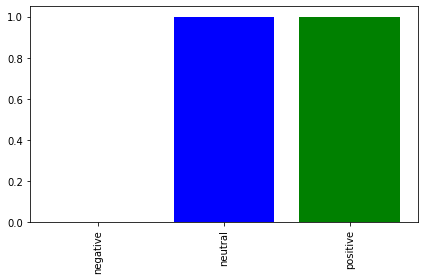

In [51]:
draw_comments_to_user_tweets_sentiment_histogram(cursor, 'Nigel Farage', 'Nigel_Farage')